In [48]:
import numpy as np
from numpy.linalg import matrix_power as mp
from numpy import linalg as LA
import matplotlib.pyplot as plt 

In [49]:
M = np.zeros([101,101])

In [50]:
#problem 1.a
for i in range (101):
    for j in range (101):
        if ((i>j)&(i-j<7)):
            M[i][j]=1/6
for i in range(1,7):
    M[100,100-i]=(7-i)/6
M[100][100]=1

In [51]:
#problem 1.b
sum=0
j=80
for i in range (101):
    sum = sum +M[i][j]
np.allclose([sum],[1])

#checking if sum of all elements in a column is one

True

sum of all the elements in a cloumn is 1 so M is a Matrix

In [52]:
#problem 1.c
X0 = np.zeros([101,1])
X0[0][0]=1
#print(X0)

In [53]:
#problem 1.d 
X1=np.dot(M,X0)
#print(X1)

In [54]:
#problem 1.e

#xk =M^k*x0
def x_vector(k):
    m=mp(M, k)
    xk=np.dot(m,X0)
    return xk
    #print(xk)

In [55]:
#x_vector(100)

In [56]:
#problem 1.h
k=0
m=mp(M, k)
xj=X0
while True:
    k=k+1
    xk=np.dot(m,xj)
    if np.array_equal(xk,xj):
        steady_state=xk
        break

In [57]:
steady_state=np.stack(steady_state,axis=1)
first_eigen=LA.eig(M)[0] #first eigen vector 
print("first eigen",first_eigen)
print("steady state",steady_state)
np.allclose([steady_state],first_eigen) #check if they are equal

first eigen [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0.]
steady state [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0.]]


True

It can be observed that first eigen vector of markov matrix is equal to the steady state vector 

In [58]:
#problem 1.h part B
a=x_vector(10)
print("probability that game finishes after 10 steps",a[100])
b=x_vector(100)
print("Probability that game finishes after 100 steps",b[100])

probability that game finishes after 10 steps [0.]
Probability that game finishes after 100 steps [1.]


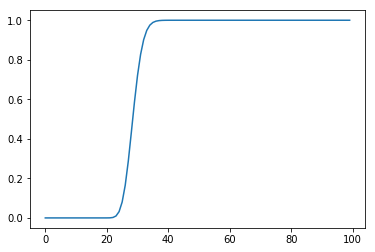

In [59]:
#problem 1.i 
x=[]
y=[]
for k in range(100):
    x.append(k)
    y.append((x_vector(k)[100]))
plt.plot(x,y)
plt.show()

In [60]:
#problem 1.j
def p_exact(k):
    p=(x_vector(k)[100])-(x_vector(k-1)[100])
    return p

In [61]:
p_exact(50)

array([1.36741174e-10])

expected number of steps to finish the game is  28.047619047619


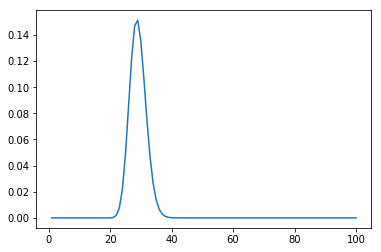

In [63]:
#problem 1.k

x=[]
y=[]
for k in range(1,101):
    x.append(k)
    y.append((p_exact(k)))
    
instance_prob=[]
for i in range(len(y)):
    instance_prob.append(y[i][0])
s=0
for j in range(len(instance_prob)):
    s += (j*instance_prob[j])
print("expected number of steps to finish the game is ",s)
plt.plot(x,y)
plt.show()